In [28]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
BMS= pd.read_excel("Steel-express.xlsx","Beams")

In [30]:
BMS

,Date,Weeks,type,purchases(kg),sales(kg),stock,price for sales(EGP),price for purchases(EGP),Total Sales(EGP),Total Purchases(EGP),Average price,Average price for sales
0,2023-01-01,1,BEAMS,37372,0,37372,0.0,44.9,0.0,1678002.8,44.900000,49.785781
1,2023-01-01,1,BEAMS,81219,0,118591,0.0,44.5,0.0,3614245.5,44.626053,49.924339
2,2023-01-01,1,BEAMS,160420,0,279011,0.0,46.0,0.0,7379320.0,45.416017,50.020612
3,2023-01-01,1,BEAMS,31129,0,310140,0.0,44.6,0.0,1388353.4,45.334113,50.076101
4,2023-01-01,1,BEAMS,13572,0,323712,0.0,44.9,0.0,609382.8,45.315912,50.085154
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2023-12-18,51,BEAMS,0,295,959094,56.5,0.0,16667.5,0.0,46.074381,52.167514
836,2023-12-18,51,BEAMS,0,4900,954194,57.5,0.0,281750.0,0.0,46.074377,52.172984
837,2023-12-18,51,BEAMS,0,4900,949294,56.4,0.0,276360.0,0.0,46.074377,52.177315
838,2023-12-18,51,BEAMS,0,5720,943574,56.3,0.0,322036.0,0.0,46.074378,52.182241


In [31]:
BMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      840 non-null    datetime64[ns]
 1   Weeks                     840 non-null    int64         
 2   type                      840 non-null    object        
 3   purchases(kg)             840 non-null    int64         
 4   sales(kg)                 840 non-null    int64         
 5   stock                     840 non-null    int64         
 6   price for sales(EGP)      840 non-null    float64       
 7   price for purchases(EGP)  840 non-null    float64       
 8   Total Sales(EGP)          840 non-null    float64       
 9   Total Purchases(EGP)      840 non-null    float64       
 10  Average price             840 non-null    float64       
 11  Average price for sales   840 non-null    float64       
dtypes: datetime64[ns](1), 

In [32]:
BMS.isnull().sum()

Date                        0
Weeks                       0
type                        0
purchases(kg)               0
sales(kg)                   0
stock                       0
price for sales(EGP)        0
price for purchases(EGP)    0
Total Sales(EGP)            0
Total Purchases(EGP)        0
Average price               0
Average price for sales     0
dtype: int64

In [33]:
## Filling Mising DATA WITH 0

BMS['price for sales(EGP)'].fillna(0,inplace=True)

BMS['price for purchases(EGP)'].fillna(0,inplace=True)


## EDA

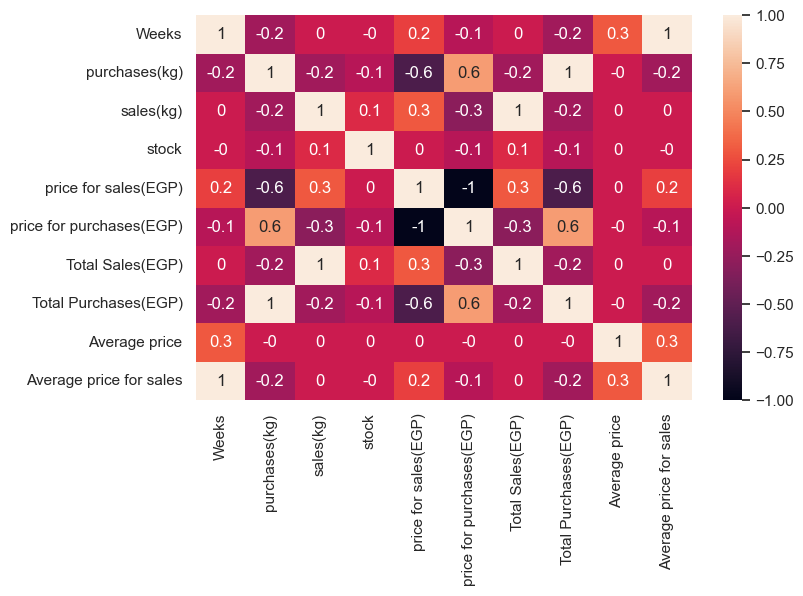

In [34]:
## correlation_matrix to see the correlation between columns
correlation_matrix = BMS.corr().round(1)
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(data=correlation_matrix, annot=True);

## Data Visualization"

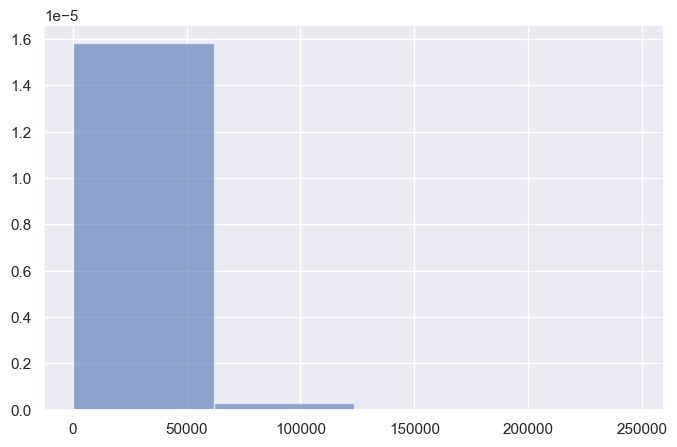

In [35]:

BMS_PUR = BMS['purchases(kg)']  

plt.hist(BMS_PUR, bins=4, density=True, alpha=0.6, color='b')

plt.show()


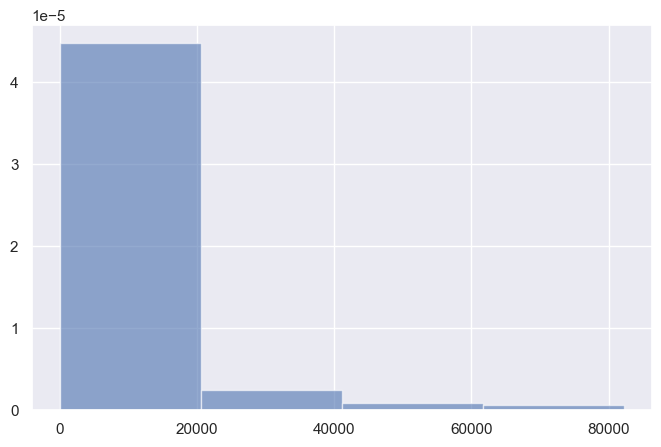

In [36]:

BMS_SALES = BMS['sales(kg)']  


plt.hist(BMS_SALES, bins=4, density=True, alpha=0.6, color='b')

plt.show()


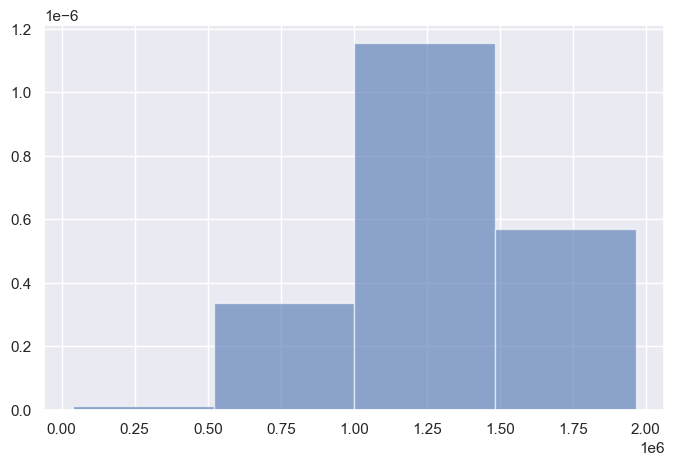

In [37]:

BMS_stock = BMS['stock']  
plt.hist(BMS_stock, bins=4, density=True, alpha=0.6, color='b')

plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\1628406726.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())


<AxesSubplot:xlabel='type'>

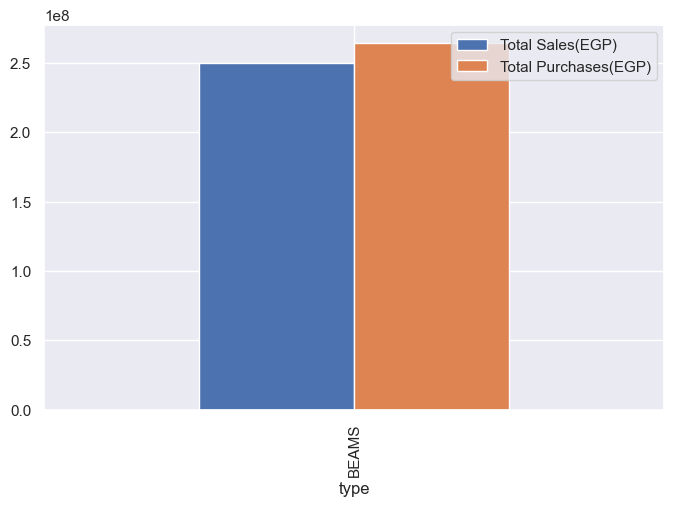

In [38]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(BMS.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\1858103713.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP.groupby('type')['Average price','Average price for sales'].mean())


<AxesSubplot:xlabel='type'>

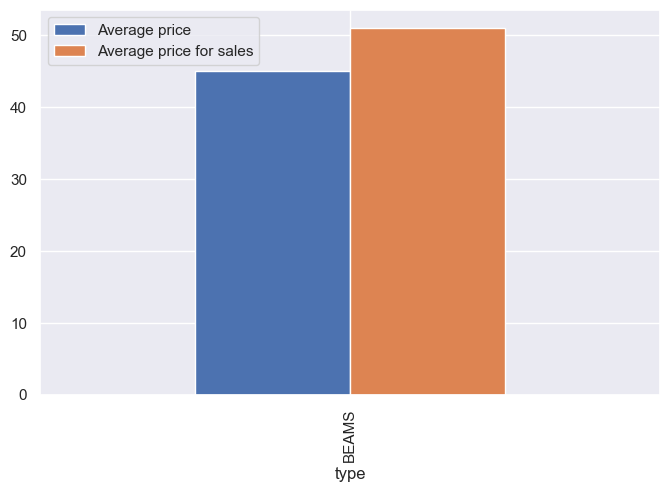

In [39]:
sum_by_type = round(BMS.groupby('type')['Average price','Average price for sales'].mean())
sum_by_type.plot(kind="bar")

## Sales_over_Time

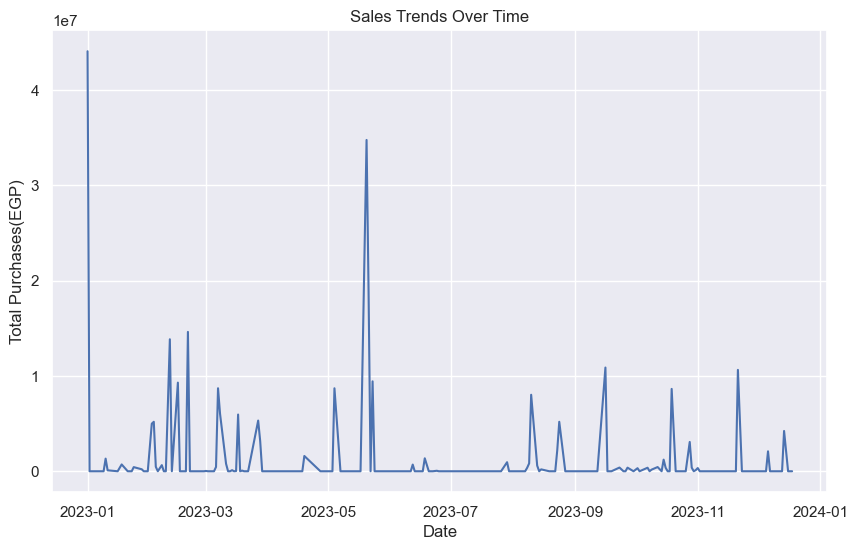

In [12]:
#the best season comes at qtr3 of each year the most selling part of the year 

BMS['Date'] = pd.to_datetime(BMS['Date'])

sales_by_date = BMS.groupby('Date')['Total Purchases(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Purchases(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchases(EGP)')
plt.grid(True)
plt.show()

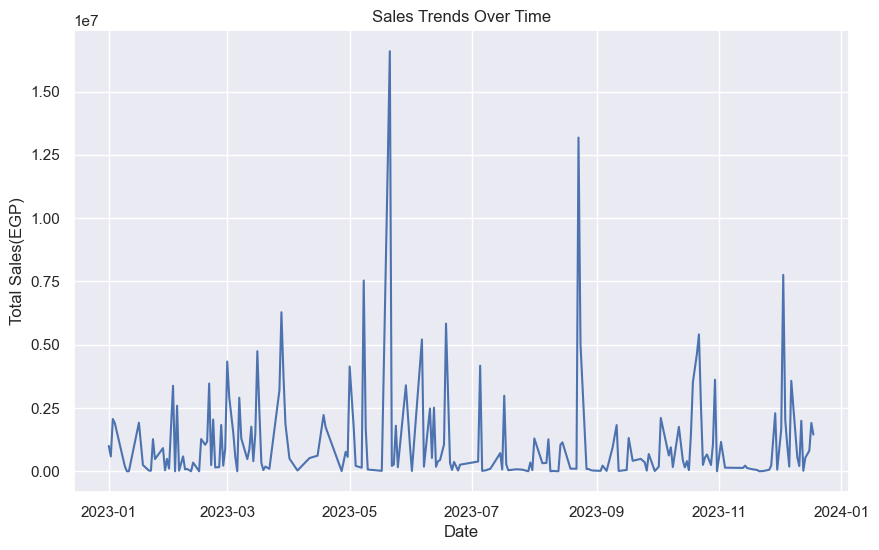

In [13]:
#the best season comes at qtr3 of each year the most selling part of the year 

BMS['Date'] = pd.to_datetime(BMS['Date'])

sales_by_date = BMS.groupby('Date')['Total Sales(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Sales(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales(EGP)')
plt.grid(True)
plt.show()

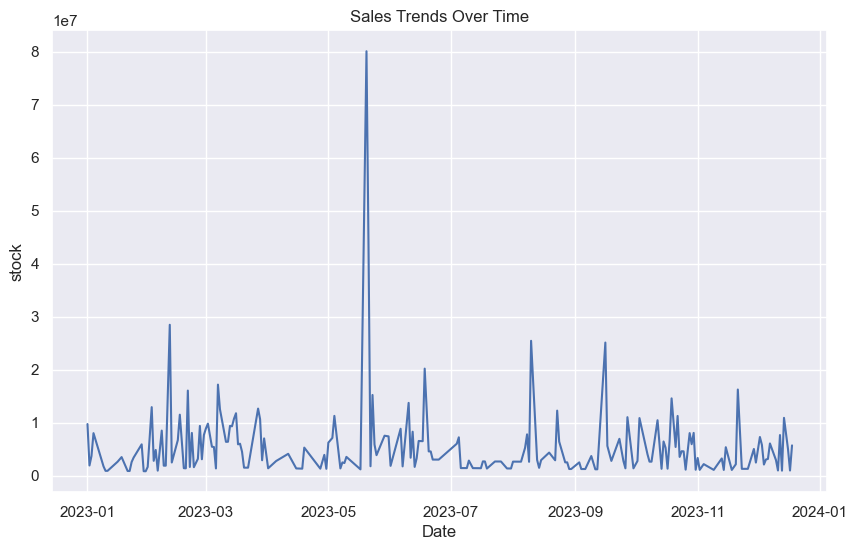

In [14]:
#the best season comes at qtr3 of each year the most selling part of the year 

BMS['Date'] = pd.to_datetime(BMS['Date'])

sales_by_date = BMS.groupby('Date')['stock'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['stock'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('stock')
plt.grid(True)
plt.show()

In [16]:
BMS_PV= pd.read_excel("ST-EXPRSS-PV.xlsx","Beams")

In [17]:
BMS_PV.head(7)

,purchases(kg),sales(kg),Stock,Holding,Order_Cost(EGP),New_Purchase,New_Stock,NEW_HOLDING,NEW_ORDER_COST,type,Week
0,981513,110214,871299,294453.9,3110900,216385.230993,106171.230993,64915.569298,685832,BEAMS,1
1,31470,3810,898959,270830.7,99744,0.000000,102361.230993,31851.369298,0,BEAMS,2
2,15480,42341,872098,274331.7,49064,0.000000,60020.230993,30708.369298,0,BEAMS,3
3,14025,53572,832551,265836.9,44452,216385.230993,222833.461985,82921.638596,685832,BEAMS,4
4,236384,130779,938156,320680.5,749218,0.000000,92054.461985,66850.038596,0,BEAMS,5
5,321666,15476,1244346,377946.6,1019518,0.000000,76578.461985,27616.338596,0,BEAMS,6
6,208521,52747,1400120,435860.1,660906,216385.230993,240216.692978,87889.107893,685832,BEAMS,7


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\3790076773.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())


<AxesSubplot:xlabel='type'>

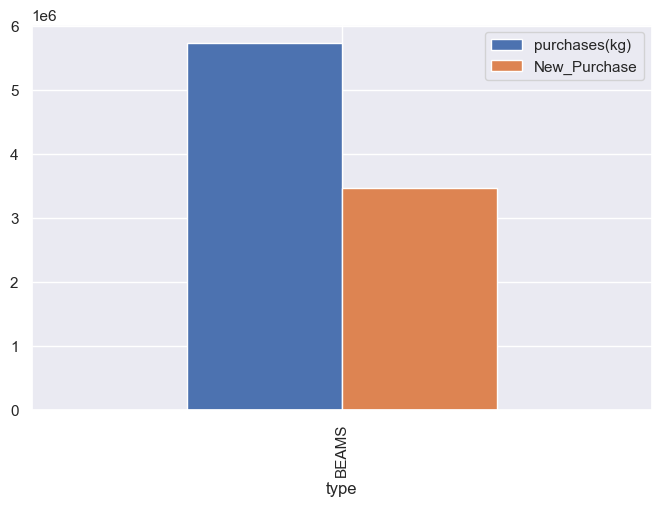

In [18]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(BMS_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\2982615617.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())


<AxesSubplot:xlabel='type'>

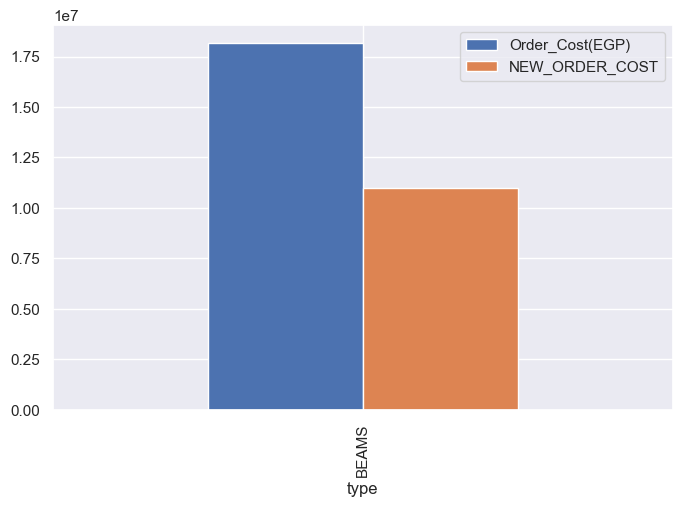

In [19]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(BMS_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\2411790820.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Holding','NEW_HOLDING'].sum())


<AxesSubplot:xlabel='type'>

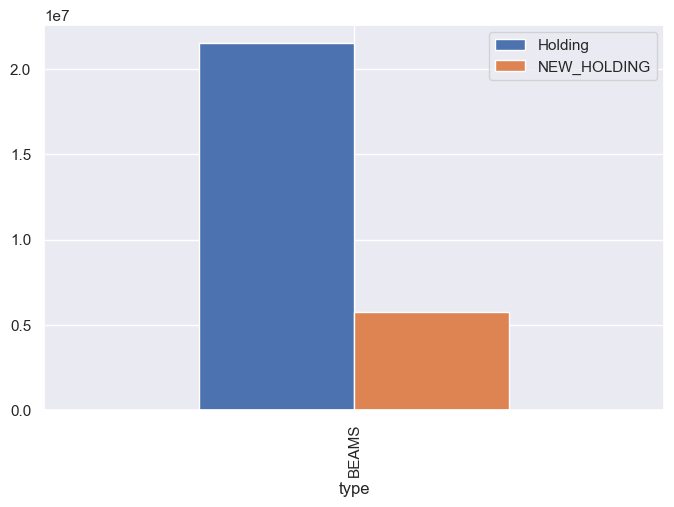

In [20]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(BMS_PV.groupby('type')['Holding','NEW_HOLDING'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\4174711715.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Stock','New_Stock'].sum())


<AxesSubplot:xlabel='type'>

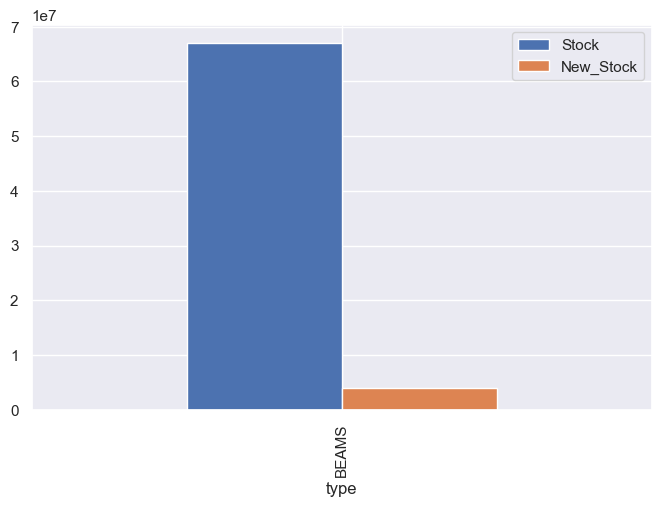

In [21]:
sum_by_type = round(BMS_PV.groupby('type')['Stock','New_Stock'].sum())
sum_by_type.plot(kind="bar")

## Time_series

In [22]:
BMS_PV.columns

Index(['purchases(kg)', 'sales(kg)', 'Stock', 'Holding', 'Order_Cost(EGP)',
       'New_Purchase', 'New_Stock', 'NEW_HOLDING', 'NEW_ORDER_COST', 'type',
       'Week'],
      dtype='object')

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\2597855365.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()


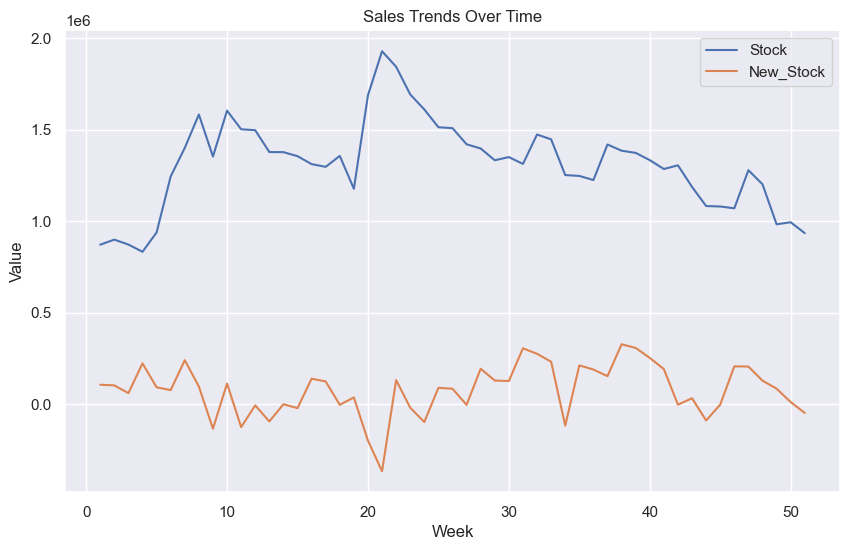

In [23]:
# Group by week and calculate the sum of each column
sales_by_week = BMS_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
BMS_PV.columns

Index(['purchases(kg)', 'sales(kg)', 'Stock', 'Holding', 'Order_Cost(EGP)',
       'New_Purchase', 'New_Stock', 'NEW_HOLDING', 'NEW_ORDER_COST', 'type',
       'Week'],
      dtype='object')

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\66380283.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()


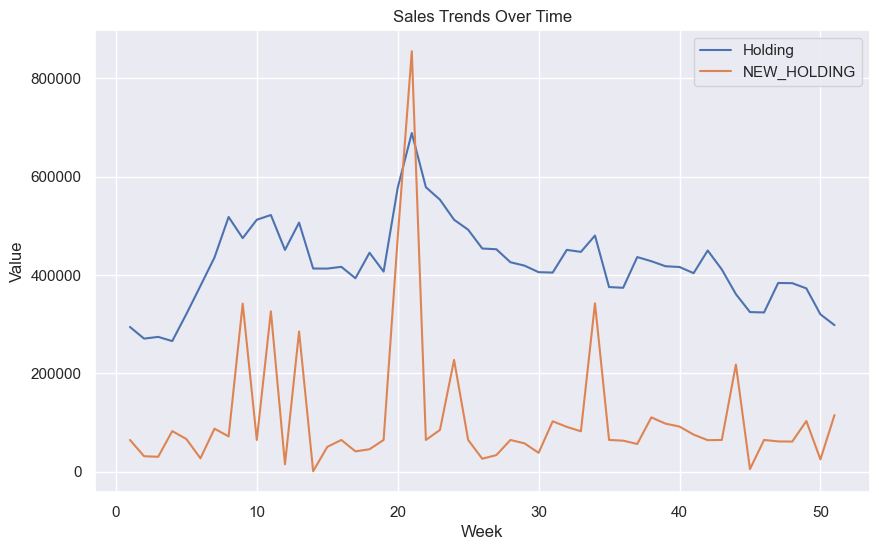

In [25]:
# Group by week and calculate the sum of each column
sales_by_week = BMS_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\3938867354.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()


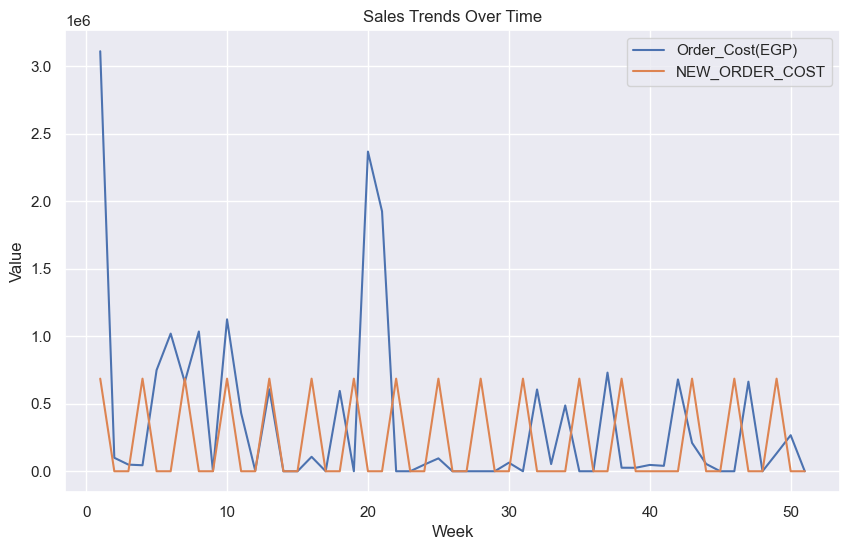

In [26]:
# Group by week and calculate the sum of each column
sales_by_week = BMS_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_1468\2493272346.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()


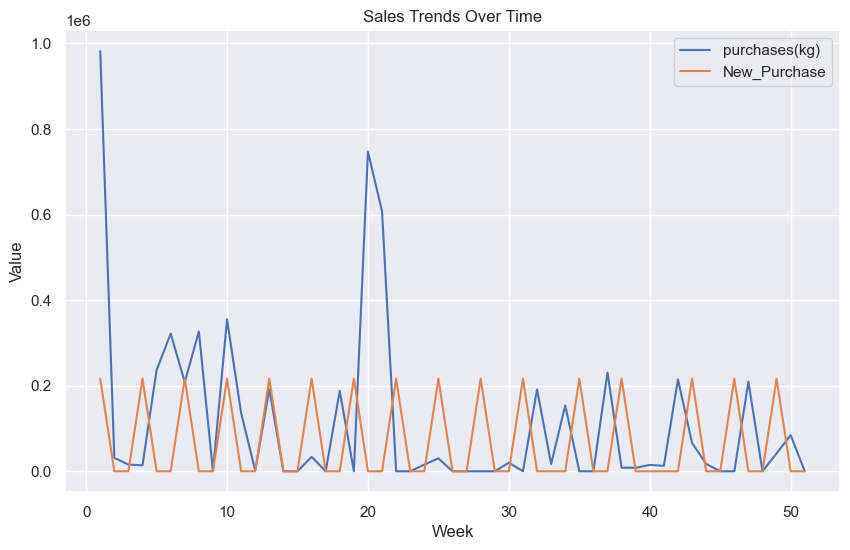

In [27]:
# Group by week and calculate the sum of each column
sales_by_week = BMS_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## Box-plots 

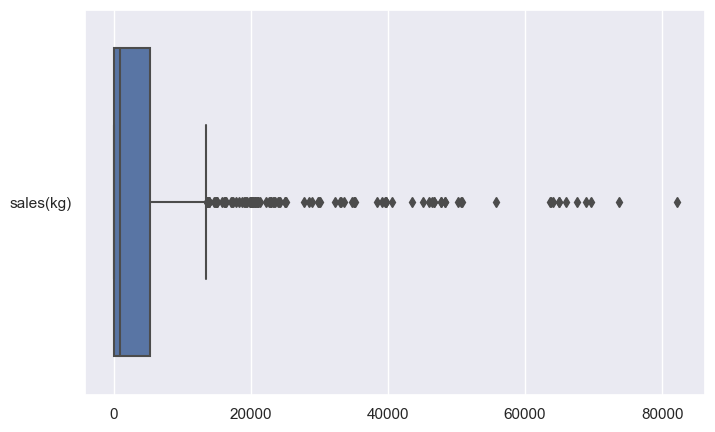

In [40]:
sns.boxplot(data=BMS[["sales(kg)"]], orient="h")
plt.show()

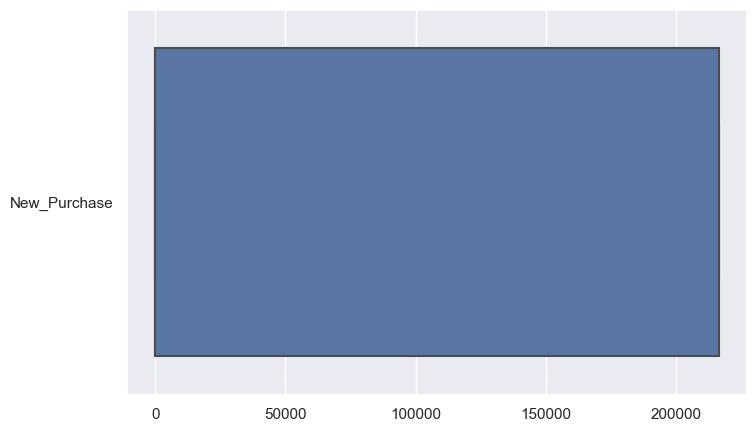

In [41]:
sns.boxplot(data=BMS_PV[["New_Purchase"]], orient="h")
plt.show()

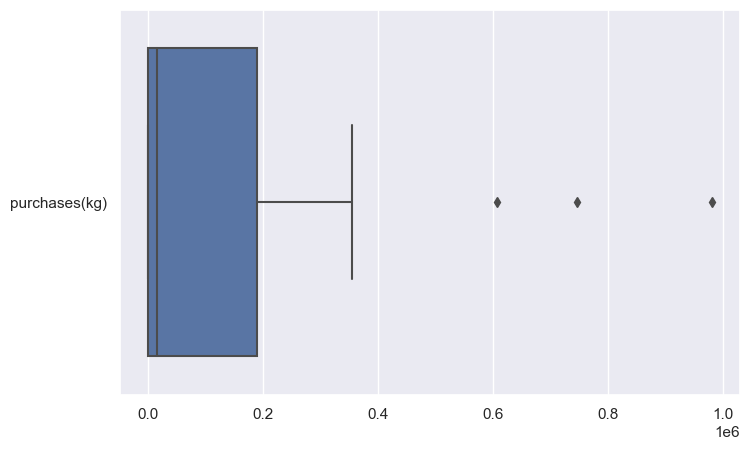

In [42]:
sns.boxplot(data=BMS_PV[["purchases(kg)"]], orient="h")
plt.show()

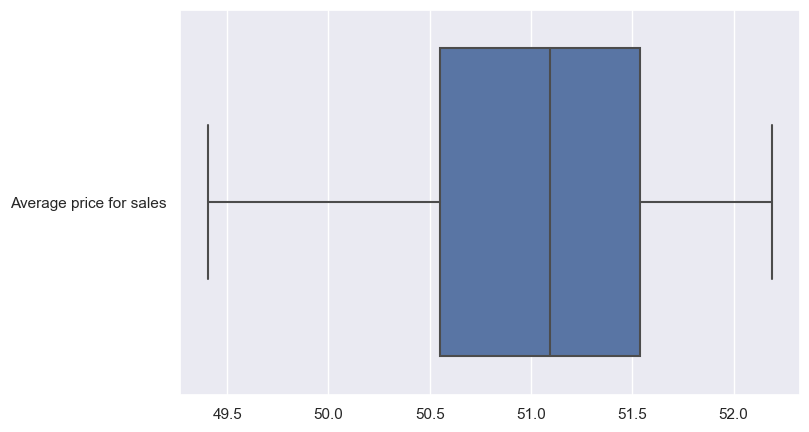

In [43]:
sns.boxplot(data=BMS[["Average price for sales"]], orient="h")
plt.show()